# Практическое задание

In [ ]:
Subbotin Mikhail, 192

### Задача Bike Sharing

Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодных условиях необходимо спрогнозировтаь спрос на прокат велосипедов.

В исходной псотановке задачи доступно 9 признаков: https://www.kaggle.com/c/prudential-life-insurance-assessment/data

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные. 

### Анализ и визуализация данных

In [2]:
from sklearn import cross_validation, ensemble, grid_search, linear_model, metrics, pipeline, preprocessing

import numpy as np
import pandas as pd
from matplotlib import pylab as plt

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
data = pd.read_csv('bike_sharing_train.csv', header = 0, sep = ',')

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,1


3 . Проанализируйте описание данных:

***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***count*** - number of total rentals

Если рассуждать чисто из бытовой логики, то скорее всего datetime, season and weather.

Humidity, temp or atemp(они сильно коррелируют, видимо)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 935.5+ KB


In [7]:
data.datetime = data.datetime.apply(pd.to_datetime)

In [8]:
data['month'] = data.datetime.apply(lambda x : x.month)
data['hour'] = data.datetime.apply(lambda x : x.hour)
data['year'] = data.datetime.apply(lambda x : x.year)
data.drop('datetime', axis=1, inplace=True)

In [9]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,hour,year
0,1,0,0,1,9.84,14.395,81,0,16,1,0,2011
1,1,0,0,1,9.02,13.635,80,0,40,1,1,2011
2,1,0,0,1,9.02,13.635,80,0,32,1,2,2011
3,1,0,0,1,9.84,14.395,75,0,13,1,3,2011
4,1,0,0,1,9.84,14.395,75,0,1,1,4,2011


In [10]:
features = data.columns.drop('count')

In [11]:
result  = ['count']

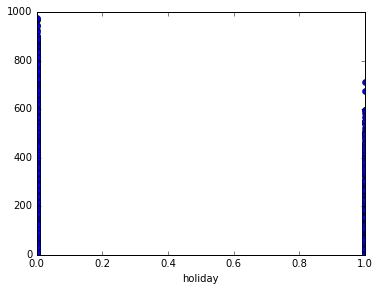

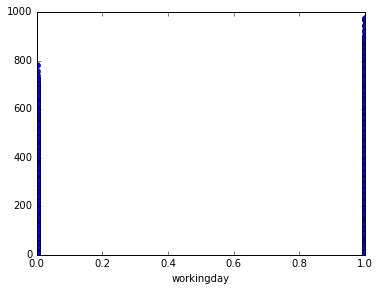

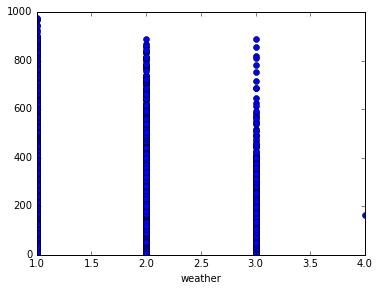

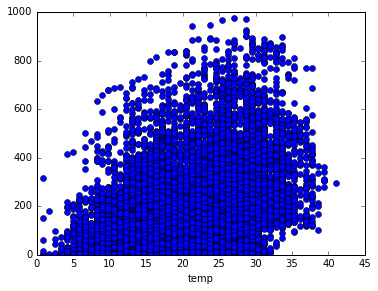

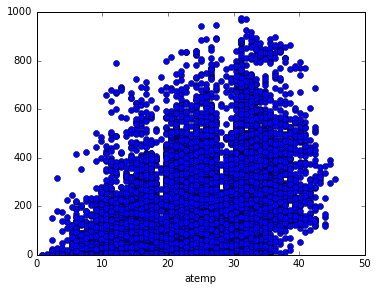

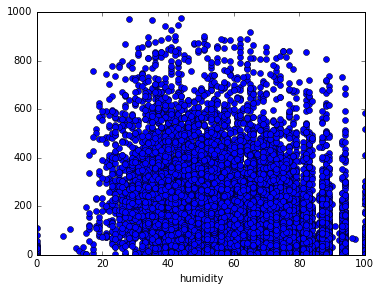

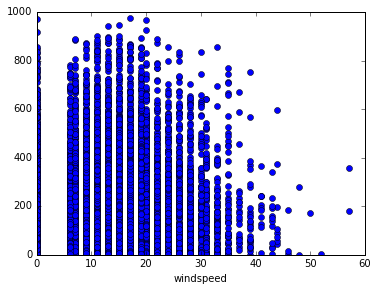

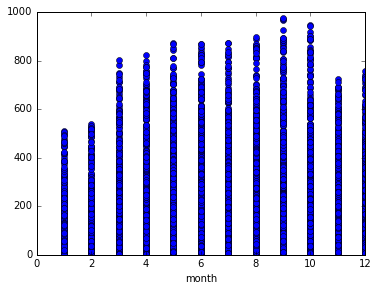

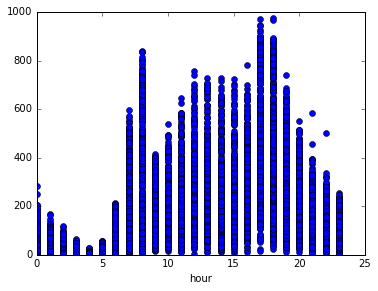

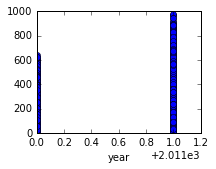

In [12]:
fig = plt.figure(figsize=(20,20))
plt.subplot(4, 3, 1)
plt.xlabel(features[1])
plt.plot(data[features[1]], data[result],'o')

fig = plt.figure(figsize=(20,20))
plt.subplot(4, 3, 2)
plt.xlabel(features[2])
plt.plot(data[features[2]], data[result],'o')

fig = plt.figure(figsize=(20,20))
plt.subplot(4, 3, 3)
plt.xlabel(features[3])
plt.plot(data[features[3]], data[result],'o')

fig = plt.figure(figsize=(20,20))
plt.subplot(4, 3, 4)
plt.xlabel(features[4])
plt.plot(data[features[4]], data[result],'o')

fig = plt.figure(figsize=(20,20))
plt.subplot(4, 3, 5)
plt.xlabel(features[5])
plt.plot(data[features[5]], data[result],'o')

fig = plt.figure(figsize=(20,20))
plt.subplot(4, 3, 6)
plt.xlabel(features[6])
plt.plot(data[features[6]], data[result],'o')

fig = plt.figure(figsize=(20,20))
plt.subplot(4, 3, 7)
plt.xlabel(features[7])
plt.plot(data[features[7]], data[result],'o')

fig = plt.figure(figsize=(20,20))
plt.subplot(4, 3, 8)
plt.xlabel(features[8])
plt.plot(data[features[8]], data[result],'o')

fig = plt.figure(figsize=(20,20))
plt.subplot(4, 3, 9)
plt.xlabel(features[9])
plt.plot(data[features[9]], data[result],'o')

fig = plt.figure(figsize=(10,10))
plt.subplot(4, 3, 10)
plt.xlabel(features[10])
plt.plot(data[features[10]], data[result],'o')

Видно, что чем хуже погода, тем меньше количество взятых велосипедов, в 2010 году, в рабочие дни пользуется большей популярнотью, по часам - с 7 утра до 8 вечера.

In [13]:
data.corrwith(data['count'])

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
month         0.166862
hour          0.400601
year          0.260403
dtype: float64

Заметна весомая корреляция с признаками hour, temp, humidity(anticorrelation)

Как видно, сильно коррелируют месяц и сезон, темп и атемп(вообще непонятно для чего нужно было вводить два практически идентичных признака).

In [14]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,hour,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,0.971524,-0.006546,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.001731,-0.000354,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.003394,0.002780,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,0.012144,-0.022740,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.257589,0.145430,0.061226
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.264173,0.140343,0.058540
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,0.204537,-0.278011,-0.078606
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.150192,0.146631,-0.015221
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.166862,0.400601,0.260403
month,0.971524,0.001731,-0.003394,0.012144,0.257589,0.264173,0.204537,-0.150192,0.166862,1.000000,-0.006818,-0.004932


In [15]:
feat_mean = data.mean()
feat_mean

season           2.506614
holiday          0.028569
workingday       0.680875
weather          1.418427
temp            20.230860
atemp           23.655084
humidity        61.886460
windspeed       12.799395
count          191.574132
month            6.521495
hour            11.541613
year          2011.501929
dtype: float64

In [16]:
feat_std = data.std()
feat_std

season          1.116174
holiday         0.166599
workingday      0.466159
weather         0.633839
temp            7.791590
atemp           8.474601
humidity       19.245033
windspeed       8.164537
count         181.144454
month           3.444373
hour            6.915838
year            0.500019
dtype: float64

### Линейные модели

In [17]:
X = data.drop('count', axis=1) 
y = data["count"]
l = len(X) 
X_train = X[:int(l * 0.75)] 
y_train = y[:int(l * 0.75)]
X_test = X[int(l * 0.75):]
y_test = y[int(l * 0.75):]

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [21]:
from sklearn.linear_model import SGDRegressor, Lasso
from sklearn.metrics import mean_absolute_error

sgd = SGDRegressor()
sgd.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

y_sgd = sgd.predict(X_test)
y_lasso = lasso.predict(X_test)

In [23]:
print (mean_absolute_error(y_train, sgd.predict(X_train)))
print (mean_absolute_error(y_train, lasso.predict(X_train)))
print (mean_absolute_error(y_test, y_sgd))
print (mean_absolute_error(y_test, y_lasso))

93.3229716761
93.759818411
141.113810789
140.574259235


In [24]:
zip(features, sgd.coef_)

[('season', 1.0231200230923629),
 ('holiday', -1.0688086852320415),
 ('workingday', -2.8608034313619939),
 ('weather', -4.1974850801450927),
 ('temp', 15.087414305626233),
 ('atemp', 30.123254423563154),
 ('humidity', -33.893601337541618),
 ('windspeed', 4.0048888993609815),
 ('month', 16.256461838213436),
 ('hour', 45.361028702004994),
 ('year', 42.357927105022618)]

In [29]:
data['new feature'] = data['temp'] * data['season']

In [30]:
X = data.drop('count', axis=1) 
y = data["count"]
l = len(X) 
X_train = X[:int(l * 0.75)] 
y_train = y[:int(l * 0.75)]
X_test = X[int(l * 0.75):]
y_test = y[int(l * 0.75):]

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


sgd = SGDRegressor()
sgd.fit(X_train, y_train)


y_sgd = sgd.predict(X_test)

print (mean_absolute_error(y_train, sgd.predict(X_train)))
print (mean_absolute_error(y_test, y_sgd))

print "Coefficients for sgd "
zip(features, sgd.coef_)

95.1149357056
140.548114496
Coefficients for sgd 


[('season', 10.367211576657624),
 ('holiday', -4.0170475097536356),
 ('workingday', -0.6072313968414994),
 ('weather', -6.1144548802838301),
 ('temp', 24.806658221960575),
 ('atemp', 40.226377567962565),
 ('humidity', -30.497680663021637),
 ('windspeed', 1.5279372135374101),
 ('month', 19.890127931809843),
 ('hour', 46.236804807383216),
 ('year', 43.379800459524468)]

In [31]:
X = data.drop('count', axis=1)
y = data['count']
y = pd.DataFrame(y)
train_size = int(0.75 * len(X))
test_size = int(0.25 * len(X))
X_train = X.head(train_size)
y_train = y.head(train_size)

X_test = X.tail(test_size)
y_test = y.tail(test_size)

In [33]:
train_data = X_train
train_labels = y_train
test_data = X_test
test_labels = y_test

binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'season', 'weather']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)


model = linear_model.SGDRegressor(random_state = 0)



estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
           
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
           
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler())            
                        ])),

        ])),
    ('model_fitting', model)
    ]
)


estimator.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))

C:\Users\Mike\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


153.86381904156465

In [34]:

binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)


categorical_data_columns = ['year', 'month', 'day', 'hour', 'season', 'weather']
categorical_data_indices = np.array([(column in categorical_data_columns) for column in train_data.columns], dtype = bool)


model = linear_model.SGDRegressor(random_state = 0)

 

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler())            
                        ])),
            
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('encoding', preprocessing.OneHotEncoder(handle_unknown='ignore'))
                            ]))
    

        ])),
    ('model_fitting', model)
    ]
)

# С цепочкой можно работать как с одиночным преобразованием, в частности вызывать методы fit и predict 
estimator.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))

C:\Users\Mike\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


112.21081324859988

112<153 следовательно качество улучшилось

In [35]:
estimator.get_params().keys()

['feature_processing__binary_variables_processing__pass_y',
 'feature_processing__binary_variables_processing__func',
 'model_fitting__learning_rate',
 'feature_processing__n_jobs',
 'feature_processing__numeric_variables_processing__selecting',
 'feature_processing__numeric_variables_processing__scaling__with_std',
 'feature_processing__categorical_variables_processing__selecting__pass_y',
 'feature_processing__categorical_variables_processing__selecting__accept_sparse',
 'feature_processing__transformer_weights',
 'feature_processing__categorical_variables_processing__encoding__dtype',
 'model_fitting__fit_intercept',
 'feature_processing',
 'model_fitting__l1_ratio',
 'feature_processing__categorical_variables_processing__selecting__validate',
 'feature_processing__transformer_list',
 'feature_processing__numeric_variables_processing__steps',
 'model_fitting__warm_start',
 'model_fitting__random_state',
 'feature_processing__numeric_variables_processing__selecting__accept_sparse',
 

### Случайный лес

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
regressor = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 50)

In [36]:
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0, with_std = 1))            
                        ])),
        
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])),
    ('model_fitting', regressor)
    ]
)

In [37]:
estimator.fit(train_data, train_labels)

C:\Users\Mike\Anaconda2\lib\site-packages\sklearn\pipeline.py:165: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.steps[-1][-1].fit(Xt, y, **fit_params)


Pipeline(steps=[('feature_processing', FeatureUnion(n_jobs=1,
       transformer_list=[('binary_variables_processing', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x0000000012427438>, pass_y=False,
          validate=True)), ('numeric_variables_processing', Pipeline(steps=[(..._estimators=50, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False))])

In [38]:
mean_absolute_error(test_labels, estimator.predict(test_data))

73.62081142488455

In [39]:
importances =  regressor.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range (train_data.shape[1]):
    print (" feature %d (%f)" % (indices[f], importances[indices[f]]))

 feature 3 (0.188241)
 feature 43 (0.095358)
 feature 1 (0.093756)
 feature 4 (0.086380)
 feature 44 (0.078157)
 feature 34 (0.060079)
 feature 2 (0.048158)
 feature 51 (0.044261)
 feature 50 (0.039699)
 feature 45 (0.029469)
 feature 5 (0.016900)
 feature 33 (0.015588)


In [40]:
mean_absolute_error(test_labels, estimator.predict(test_data))

73.62081142488455

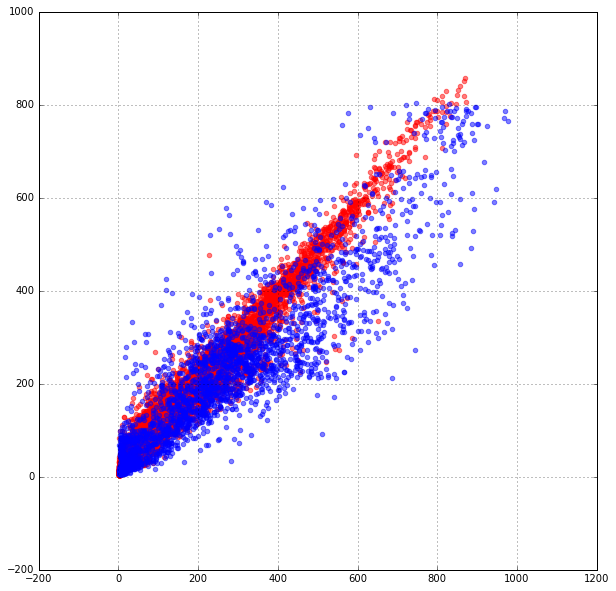

In [42]:
pylab.figure(figsize=(10,10))
pylab.grid(True)
pylab.scatter(train_labels, estimator.predict(train_data), alpha=0.5, color= 'red')
pylab.scatter(test_labels, estimator.predict(test_data), alpha=0.5, color= 'blue')

### Опциональная часть

Попробуйте улучшить результат, полученный на предыдущих шагах. В этом разделе можно и нужно пользоваться любыми изученными алгоритмами, инструментами и всем, чем вам захочется.

### Заключение

В этом разделе Вы можете написать, какие выводы Вы сделали в процессе работы над заданием, понравилось ли оно Вам, а также всё, что Вы о задании думаете =)